In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from tensorflow.examples.tutorials.mnist import input_data

In [18]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [19]:
tf.reset_default_graph() 

In [20]:
# DEFINE parameters
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = 98
neurons_hid4 = 49
neurons_hid5 = 25
neurons_hid6 = 12
neurons_hid7 = 6
neurons_hid8 = 3
neurons_hid9 = 2
neurons_hid10 = 1

learning_rate = 0.0001

In [21]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [22]:
# TRANSPOSE OR PINV
tie_weight = tf.transpose #pinv

In [23]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [24]:
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

# w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w1 = tf.Variable(np.load('./save/weights/w1.npy'))
w1_ = tie_weight(w1)

w2 = tf.Variable(np.load('./save/weights/w2.npy'))
w2_ = tie_weight(w2)

w3 = tf.Variable(np.load('./save/weights/w3.npy'))
w3_ = tie_weight(w3)

w4 = tf.Variable(np.load('./save/weights/w4.npy'))
w4_ = tie_weight(w4)

w5 = tf.Variable(np.load('./save/weights/w5.npy'))
w5_ = tie_weight(w5)

w6 = tf.Variable(np.load('./save/weights/w6.npy'))
w6_ = tie_weight(w6)

w7 = tf.Variable(np.load('./save/weights/w7.npy'))
w7_ = tie_weight(w7)

w8 = tf.Variable(initializer([neurons_hid7, neurons_hid8]), dtype=tf.float32)
w8_ = tie_weight(w8)

In [25]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
act_func = lambda X:X #tf.nn.relu

In [26]:
# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1))
hid_layer2 = act_func(tf.matmul(hid_layer1, w2))
hid_layer3 = act_func(tf.matmul(hid_layer2, w3))
hid_layer4 = act_func(tf.matmul(hid_layer3, w4))
hid_layer5 = act_func(tf.matmul(hid_layer4, w5))
hid_layer6 = act_func(tf.matmul(hid_layer5, w6))
hid_layer7 = act_func(tf.matmul(hid_layer6, w7))

hid_layer8 = act_func(tf.matmul(hid_layer7, w8))

hid_layer7_ = act_func(tf.matmul(hid_layer8, w8_))

hid_layer6_ = act_func(tf.matmul(hid_layer7_, w7_))
hid_layer5_ = act_func(tf.matmul(hid_layer6_, w6_))
hid_layer4_ = act_func(tf.matmul(hid_layer5_, w5_))
hid_layer3_ = act_func(tf.matmul(hid_layer4_, w4_))
hid_layer2_ = act_func(tf.matmul(hid_layer3_, w3_))
hid_layer1_ = act_func(tf.matmul(hid_layer2_,w2_))

output_layer = tf.matmul(hid_layer1_, w1_)

In [27]:
# LOSS FUNCTIONS
loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=yout))

In [28]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w8])

In [29]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [30]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: X_batch})

            training_loss = loss.eval(feed_dict={X: X_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            saver.save(sess, "./save/ae_8_3.ckpt")      
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 0.07999961823225021
Epoch 1 Complete. Training Loss: 0.07899045199155807
Epoch 2 Complete. Training Loss: 0.07211938500404358
Epoch 3 Complete. Training Loss: 0.07096059620380402
Epoch 4 Complete. Training Loss: 0.0641823410987854
Epoch 5 Complete. Training Loss: 0.0632481500506401
Epoch 6 Complete. Training Loss: 0.057420894503593445
Epoch 7 Complete. Training Loss: 0.059249766170978546
Epoch 8 Complete. Training Loss: 0.05622308701276779
Epoch 9 Complete. Training Loss: 0.05476687103509903
Epoch 10 Complete. Training Loss: 0.05575793236494064
Epoch 11 Complete. Training Loss: 0.055992331355810165
Epoch 12 Complete. Training Loss: 0.05480414256453514
Epoch 13 Complete. Training Loss: 0.05503888055682182
Epoch 14 Complete. Training Loss: 0.056033674627542496
Epoch 15 Complete. Training Loss: 0.05424719676375389
Epoch 16 Complete. Training Loss: 0.054132137447595596
Epoch 17 Complete. Training Loss: 0.05406083166599274
Epoch 18 Complete. Training Loss: 0

In [31]:
num_test_images = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/ae_8_3.ckpt")
    
    results,compressed = sess.run([output_layer, hid_layer1],
                                  feed_dict={X:mnist.test.images[start_point:num_test_images+start_point]})
    weight8 = w8.eval()

INFO:tensorflow:Restoring parameters from ./save/ae_8_3.ckpt


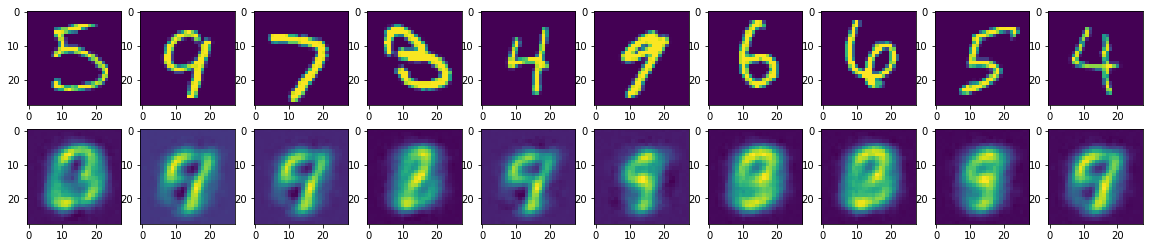

In [32]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(2, num_test_images, figsize=(20, 4))
for i in range(start_point,num_test_images+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][j].imshow(np.reshape(results[j], (28, 28)))

In [34]:
print(weight8.shape)
np.save('./save/weights/w8.npy',weight8)
#wt1 = np.load('./save/weights/w1.npy')

(6, 3)
